In [478]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import numpy as np
import math
from ucimlrepo import fetch_ucirepo 
from scipy.optimize import line_search
import matplotlib.pyplot as plt

In [469]:
wine = fetch_ucirepo(id=109) 

X = wine.data.features 
y = wine.data.targets

In [470]:
X = X[:130]
y = y[:130]
y['class'].value_counts()

class
2    71
1    59
Name: count, dtype: int64

In [471]:
#scaler = MinMaxScaler()
scaler = StandardScaler()

df_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_norm.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02
mean,7.651999e-16,1.708035e-17,2.732857e-16,1.639714e-16,-3.825999e-16,-1.639714e-16,2.732857e-16,-3.825999e-16,-8.198570e-17,2.732857e-16,-5.773160e-16,9.018427e-16,-1.093143e-16
std,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00,1.003868e+00
min,-2.161957e+00,-1.400991e+00,-3.312182e+00,-2.416453e+00,-1.951429e+00,-2.618653e+00,-2.612521e+00,-1.842617e+00,-2.497495e+00,-1.799777e+00,-2.195268e+00,-2.882492e+00,-1.458310e+00
25%,-8.093764e-01,-5.225744e-01,-5.758509e-01,-6.673009e-01,-7.766557e-01,-6.905910e-01,-6.633354e-01,-6.462964e-01,-6.137474e-01,-8.226336e-01,-7.075249e-01,-4.687685e-01,-9.001514e-01
50%,7.446037e-02,-2.715983e-01,-6.912290e-02,-6.948922e-02,-1.240038e-01,6.866973e-02,1.020516e-01,-2.781977e-01,-8.815866e-02,-2.005346e-01,-5.291788e-02,5.411680e-02,-2.109963e-01
75%,8.848793e-01,1.020139e-01,6.318509e-01,6.390283e-01,5.286480e-01,7.635083e-01,6.905492e-01,6.190429e-01,4.699887e-01,7.287547e-01,6.463214e-01,7.301706e-01,7.793083e-01
max,2.130157e+00,4.371460e+00,3.005027e+00,3.310730e+00,4.052968e+00,2.498304e+00,3.524182e+00,3.034691e+00,3.400262e+00,2.905329e+00,3.874724e+00,2.209038e+00,2.534233e+00


In [472]:
X = df_norm.to_numpy()
y = np.array([i-1 for i in list(y['class'])])

In [473]:
model = LogisticRegression(penalty = None,max_iter=200).fit(X,y)
y_prob = model.predict_proba(X)
loss_lreg = log_loss(y, y_prob)
loss_lreg

7.292437743938115e-07

In [474]:
def logistic(y):
    return 1.0/(1+np.exp(-y))

def logloss(X,w,y):
    y_prob = logistic(np.dot(X,w))
    return log_loss(y, y_prob)

In [475]:
def hessian(X,y_prob):
    return np.matmul(np.matmul(X.T,np.diag(y_prob)),X)

In [476]:
def coordinate_descent_gradient(X,y,max_iter,lr=.1):
    X = np.insert(X,0,1,axis=1)
    n_samples = X.shape[0]
    n_features = X.shape[1]
    weights = np.random.normal(0, 0.01, n_features)
    initial_loss = logloss(X,weights,y)
    ls = [initial_loss]
    print("Iteration: 0" + "   loss: "+str(initial_loss))
    for i in range(max_iter):
        y_prob = logistic(np.dot(X,weights))
        grad = np.dot(X.T,(y_prob-y))#/n_samples
        pick = np.argmax(np.abs(grad))
        weights[pick] -= lr*grad[pick]
        loss = logloss(X,weights,y)
        ls.append(loss)
        if((i+1)%10000==0):
            print("Iteration: "+ str(i+1) + "   loss: "+str(loss))
        #print(weights)
    return ls
        
#coordinate_descent_gradient(X,y,)  
loss1s = coordinate_descent_gradient(X,y,200000)  

Iteration: 0   loss: 0.6903904603886847
Iteration: 10000   loss: 0.00018854732457440748
Iteration: 20000   loss: 9.734707455094677e-05
Iteration: 30000   loss: 6.58356747070647e-05
Iteration: 40000   loss: 4.980841648981822e-05
Iteration: 50000   loss: 4.008866283634282e-05
Iteration: 60000   loss: 3.35596095926181e-05
Iteration: 70000   loss: 2.8869116232329535e-05
Iteration: 80000   loss: 2.5335113910391005e-05
Iteration: 90000   loss: 2.257607786351572e-05
Iteration: 100000   loss: 2.0361828921225497e-05
Iteration: 110000   loss: 1.8545217197030153e-05
Iteration: 120000   loss: 1.702776040368502e-05
Iteration: 130000   loss: 1.5741048647411e-05
Iteration: 140000   loss: 1.4636073261160829e-05
Iteration: 150000   loss: 1.367680028495526e-05
Iteration: 160000   loss: 1.2836140674669176e-05
Iteration: 170000   loss: 1.2093335300771136e-05
Iteration: 180000   loss: 1.1432206959812491e-05
Iteration: 190000   loss: 1.0839961556357441e-05
Iteration: 200000   loss: 1.0306347164872382e-05


In [498]:
def coordinate_descent_random_gradient(X,y,max_iter,lr=.1):
    X = np.insert(X,0,1,axis=1)
    n_samples = X.shape[0]
    n_features = X.shape[1]
    weights = np.random.normal(0, 0.01, n_features)
    initial_loss = logloss(X,weights,y)
    ls = [initial_loss]
    print("Iteration: 0" + "   loss: "+str(initial_loss))
    for i in range(max_iter):
        y_prob = logistic(np.dot(X,weights))
        grad = np.dot(X.T,(y_prob-y))#/n_samples
        pick = np.random.randint(0, 13)
        weights[pick] -= lr*grad[pick]
        loss = logloss(X,weights,y)
        ls.append(loss)
        if((i+1)%10000==0):
            print("Iteration: "+ str(i+1) + "   loss: "+str(loss))
    return ls
        
loss1r = coordinate_descent_random_gradient(X,y,200000)   

Iteration: 0   loss: 0.6971138504294091
Iteration: 10000   loss: 0.0011934181297882263
Iteration: 20000   loss: 0.0006310008130747647
Iteration: 30000   loss: 0.0004297510687675009
Iteration: 40000   loss: 0.0003227398015914253
Iteration: 50000   loss: 0.00026030449853506777
Iteration: 60000   loss: 0.0002181882535222798
Iteration: 70000   loss: 0.0001883242600103548
Iteration: 80000   loss: 0.00016566028925278477
Iteration: 90000   loss: 0.00014801165778837336
Iteration: 100000   loss: 0.0001338638662150378
Iteration: 110000   loss: 0.0001221032658136578
Iteration: 120000   loss: 0.0001122567221525208
Iteration: 130000   loss: 0.00010370774317911805
Iteration: 140000   loss: 9.631099610261816e-05
Iteration: 150000   loss: 8.997952721573228e-05
Iteration: 160000   loss: 8.453116860916722e-05
Iteration: 170000   loss: 7.962259483470823e-05
Iteration: 180000   loss: 7.540252341931665e-05
Iteration: 190000   loss: 7.156985410463349e-05
Iteration: 200000   loss: 6.81038624080378e-05


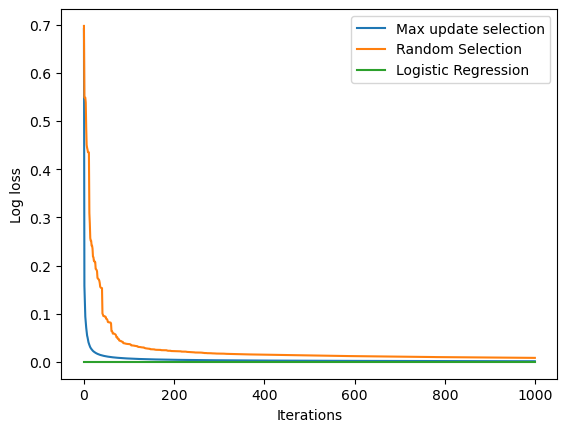

In [526]:
n = 1000
start = 0
x = [i+start for i in range(n)]
lreg = [loss_lreg for i in range(n)]
plt.plot(x,loss1s[start:n+start], label = "Max update selection")
plt.plot(x,loss1r[start:n+start], label = "Random Selection")
plt.plot(x,lreg[:n], label = "Logistic Regression")

plt.xlabel("Iterations")
plt.ylabel("Log loss")

plt.legend() 
plt.show()

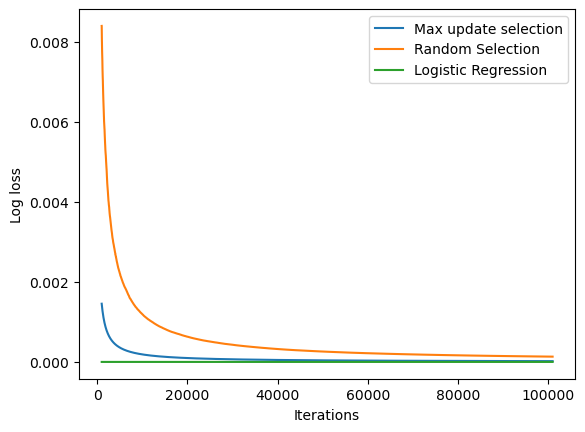

In [527]:
n = 100000
start = 1000
x = [i+start for i in range(n)]
lreg = [loss_lreg for i in range(n)]
plt.plot(x,loss1s[start:n+start], label = "Max update selection")
plt.plot(x,loss1r[start:n+start], label = "Random Selection")
plt.plot(x,lreg[:n], label = "Logistic Regression")

plt.xlabel("Iterations")
plt.ylabel("Log loss")

plt.legend() 
plt.show()

In [518]:
def coordinate_descent_hessian(X,y,max_iter):
    X = np.insert(X,0,1,axis=1)
    n_samples = X.shape[0]
    n_features = X.shape[1]
    weights = np.random.normal(0, 0.01, n_features)
    initial_loss = logloss(X,weights,y)
    ls = [initial_loss]
    print("Iteration: 0" + "   loss: "+str(initial_loss))
    for i in range(max_iter):
        y_prob = logistic(np.dot(X,weights))
        
        grad = np.dot(X.T,(y_prob-y))#/n_samples
        H = (hessian(X,y_prob))
        H_inv = np.linalg.inv(H)
        
        delta = np.matmul(H_inv,grad)
        pick = np.argmax(np.abs(delta))
        #pick = np.argmax(np.abs(grad))
        
        weights[pick] -= delta[pick]
        loss = logloss(X,weights,y)
        ls.append(loss)

        if((i+1)%10000==0):
            print("Iteration: "+ str(i+1) + "   loss: "+str(loss))
    return ls
        
loss2s = coordinate_descent_hessian(X,y,200000)   

Iteration: 0   loss: 0.7017863340494186
Iteration: 10000   loss: 0.0027498909207778486
Iteration: 20000   loss: 0.0015844752332797526
Iteration: 30000   loss: 0.0011213378633768215
Iteration: 40000   loss: 0.0008709421571232945
Iteration: 50000   loss: 0.0007135448621648047
Iteration: 60000   loss: 0.000605236313882924
Iteration: 70000   loss: 0.00052602698425397
Iteration: 80000   loss: 0.000465544031636318
Iteration: 90000   loss: 0.00041777390259912085
Iteration: 100000   loss: 0.0003790970111569904
Iteration: 110000   loss: 0.0003471119941356405
Iteration: 120000   loss: 0.0003202153606048875
Iteration: 130000   loss: 0.0002972687711021797
Iteration: 140000   loss: 0.0002774619953674894
Iteration: 150000   loss: 0.0002601772434921201
Iteration: 160000   loss: 0.00024497049505741884
Iteration: 170000   loss: 0.00023147699964640086
Iteration: 180000   loss: 0.00021942481893382726
Iteration: 190000   loss: 0.00020859394738823473
Iteration: 200000   loss: 0.00019880183760410223


In [521]:
def coordinate_descent_random_hessian(X,y,max_iter):
    X = np.insert(X,0,1,axis=1)
    n_samples = X.shape[0]
    n_features = X.shape[1]
    weights = np.random.normal(0, 0.001, n_features)
    initial_loss = logloss(X,weights,y)
    ls = [initial_loss]
    print("Iteration: 0" + "   loss: "+str(initial_loss))
    for i in range(max_iter):
        y_prob = logistic(np.dot(X,weights))
        
        grad = np.dot(X.T,(y_prob-y))/n_samples
        H = (hessian(X,y_prob))
        H_inv = np.linalg.inv(H)
        
        delta = np.matmul(H_inv,grad)
        pick = np.random.randint(0, 13)
        #print(pick)
        #pick = np.argmax(np.abs(delta))
        
        weights[pick] -= delta[pick]
        loss = logloss(X,weights,y)
        ls.append(loss)

        if((i+1)%10000==0):
            print("Iteration: "+ str(i+1) + "   loss: "+str(loss))
    return ls
        
loss2r = coordinate_descent_random_hessian(X,y,200000)   

Iteration: 0   loss: 0.691557503663448
Iteration: 10000   loss: 0.32168843239672995
Iteration: 20000   loss: 0.31631499610803193
Iteration: 30000   loss: 0.3174075101235929
Iteration: 40000   loss: 0.31738904181189115
Iteration: 50000   loss: 0.3172671650175636
Iteration: 60000   loss: 0.31722294791055533
Iteration: 70000   loss: 0.3172052958045988
Iteration: 80000   loss: 0.31719880244312537
Iteration: 90000   loss: 0.3171962389483934
Iteration: 100000   loss: 0.3171952866487816
Iteration: 110000   loss: 0.3171949445027117
Iteration: 120000   loss: 0.3171948404498702
Iteration: 130000   loss: 0.31719480666039485
Iteration: 140000   loss: 0.3171947958329806
Iteration: 150000   loss: 0.3171947908788463
Iteration: 160000   loss: 0.3171947892840135
Iteration: 170000   loss: 0.3171947887699575
Iteration: 180000   loss: 0.31719478858771843
Iteration: 190000   loss: 0.31719478851677796
Iteration: 200000   loss: 0.31719478849299515


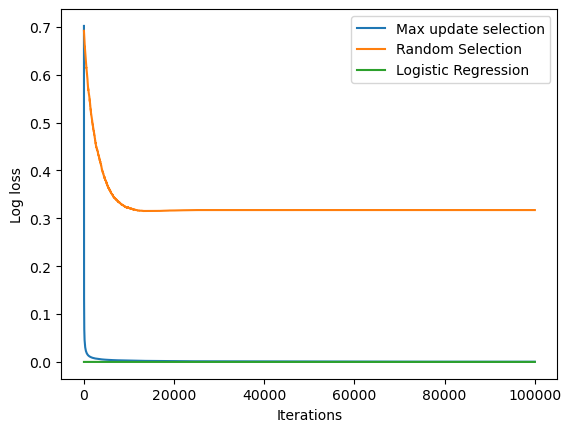

In [528]:
n = 100000
start = 0
x = [i+start for i in range(n)]
lreg = [loss_lreg for i in range(n)]
plt.plot(x,loss2s[start:n+start], label = "Max update selection")
plt.plot(x,loss2r[start:n+start], label = "Random Selection")
plt.plot(x,lreg[:n], label = "Logistic Regression")

plt.xlabel("Iterations")
plt.ylabel("Log loss")

plt.legend() 
plt.show()